
<div style="direction:rtl", align='right'> 
برای لود کردن دیتا ها از گوگل  درایو استفاده کرده و در هر بار اجرای کد آن ها داخل گوگل کولب مونت می کنیم
 </div>




In [459]:
from google.colab import drive
drive.mount('/content/drive') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



<div style="direction:rtl", align='right'> 
با استفاده از کامند

 cd و ls
 
  به مسیر پروژه می رویم
 </div>




In [460]:
%cd drive/MyDrive/ci_project_3rd_phase/
%ls


[Errno 2] No such file or directory: 'drive/MyDrive/ci_project_3rd_phase/'
/content/drive/MyDrive/ci_project_3rd_phase
chb01_03.edf       main.py    models/          seizure_data/
CI_project3.ipynb  model.png  notSezure_data/


<div style="rtl", align='right'>
برای لود کردن دیتا های سیگنال نیاز به استفاده از کتاب خانه مخصوص آن داریم. برای 
نصب آن از دستور

pip install 

استفاده می کنیم
</div>

In [461]:
!pip install pyEDFlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# imports

In [462]:
#sajjad shafaf
#hesari
import random
import pyedflib
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
import random
import os
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import pickle
from scipy.signal import butter, lfilter
from sklearn.svm import SVC

import random
import os
# my imports#############################
import scipy.stats as stats
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns; 
sns.set()  # for plot styling
from sklearn import tree

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn import metrics


# loading datas

<div style="rtl", align='right'>
 در این پروژه بدنبال طراحی سیستمی هستیم که در آن بتوانیم سیگنال های مغزی یک شخص را بگیریم و وجود یک تشنج را در این سگنال بررسی کنیم 
و در صورت وجود سیگنال بازه تشنج را تشخیص داده و آن را گزارش بدهیم.

برای این کار مقداری داده از لینک زیر دانلود کرده و برای آموزش سیستم از آن استفاده میکنیم.

https://physionet.org/content/chbmit/1.0.0/

انتخاب داده ها برای سادگی کار از ۳ شخص
  - ch01
  - ch02
  - ch03

میباشد.

توزیع داده ها هم به شکل زیر است

پنجاه درصد داده ها دارای تشنج هستند.

حدود 12.5 درصد داده ها سالم از داده هایی است که در آن تشنج اتفاق افتاده است.

بقیه داده ها هم از بازه هایی بدون وجوود تشنج در آن ها هستند

همان طور که در کد زیر آمده است اطلاعات موجود فایل ها را با یک ساختار دیکشنری میسازیم. 

برای داده های تشنج مقادیر موجود در داده های دیکشنری زمان وقوع تشنج است
و برای داده های بدون تشنج هم زمان ابتدا و انتها که مشخصا برای اکثر داده ها صفر تا ۳۶۰۰ هست.

 </div>




In [463]:
seed = 57
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

window_shift_len = 0.5
windows_size = 7
freq_sampling = 256
window_len = windows_size * freq_sampling
seizure_data_set = []
notSeizure_data_set = []


seizure_info = dict({
    "seizure_data/chb01_03.edf": [2996, 3036],       #01- len = 40
    "seizure_data/chb01_04.edf": [1467, 1494],       #02- len = 27
    "seizure_data/chb01_15.edf": [1732, 1772],       #03- len = 40
    "seizure_data/chb01_16.edf": [1015, 1066],       #04- len = 51
    "seizure_data/chb01_18.edf": [1720, 1810],       #05- len = 90
    "seizure_data/chb01_21.edf": [327, 420],         #06- len = 93
    "seizure_data/chb01_26.edf": [1862, 1963],       #07- len = 99

    "seizure_data/chb02_16.edf": [130, 212],         #08- len = 82
    "seizure_data/chb02_16+.edf": [2972, 3053],      #09- len = 81
    "seizure_data/chb02_19.edf": [3369, 3378],       #10- len = 109

    "seizure_data/chb03_01.edf": [362, 414],         #11- len = 52
    "seizure_data/chb03_02.edf": [731, 796],         #12- len = 65
    "seizure_data/chb03_03.edf": [432, 501],         #13- len = 69
    "seizure_data/chb03_04.edf": [2162, 2214],       #14- len = 52
    "seizure_data/chb03_34.edf": [1982, 2029],       #15- len = 47
    "seizure_data/chb03_35.edf": [2592, 2656],       #16- len = 66
    "seizure_data/chb03_36.edf": [1725, 1778]        #17- len = 53
})

notS_data = dict({
    "notSezure_data/chb01_01.edf": [0, 3600],
    "notSezure_data/chb01_02.edf": [0, 3600],
    "notSezure_data/chb01_05.edf": [0, 3600],
    "notSezure_data/chb01_06.edf": [0, 3600],

    "notSezure_data/chb02_01.edf": [0, 3600],
    "notSezure_data/chb02_02.edf": [0, 3600],

    "notSezure_data/chb03_05.edf": [0, 3600],
    "notSezure_data/chb03_06.edf": [0, 3600],
    "notSezure_data/chb03_07.edf": [0, 3600],
    "notSezure_data/chb03_08.edf": [0, 3600]
})

# extracting seizure windows

<div style="direction:rtl", align='right'> در این قسمت به آماده سازی داده ها میپردازیم

با استفاده از کتابخانه پایین به خواندن داده ها میپردازیم

pyedflib

همانطور که در کلاس مطرح شد تنها داده های کانال های  

fz-cz,
cz-pz

مورد بررسی قرار میگیرد در نتیچه تنها سیگنالهای ۱۶و۱۷ خوانده میشوند.

در ادامه بعد از خواندن این دو کانال فیلتر مورد بررسی در فاز اول را بر روی داده ها اجرا میکنیم

برای خواندن داده ها هم از پارامترهای زیر استفاده کرده ایم

window_shift_len = 0.5

windows_size = 7

سایز پنجره ها را برابر ۷ ثانیه و مقدار شیفت هر پنجره را هم ۰.۵ در نظر میگیریم

نحوه کار کد به این صورت است که در هر بار اجرای حلقه بیرونی، یک دیتا را از روی درایو می خواند. بعد از جدا کردن دو چنل مورد نظر، با توجه به مقدار زمان شروع و پایان تشنج، بازه تشنج را بدست آورده و با استفاده از یک حلقه دیگر روی این بازه پنجره های خود را با توجه به سایز پنجره و مقدار شیفت پنجره انتخاب و لیبل آن ها را برابر با 1 به معنی تشنج قرار می دهیم 
</div>


In [464]:

for file_name in seizure_info:
    f = pyedflib.EdfReader(file_name)
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((2, f.getNSamples()[0]))
    
    # for i in np.arange(n):
    sigbufs[0, :] = f.readSignal(16)
    sigbufs[1, :] = f.readSignal(17)
    # butter filter
    b, a = butter(3, [0.5,40], btype='bandpass',fs=freq_sampling)
    channel1_filtered = np.array([lfilter(b,a,sigbufs[0,:])])
    channel2_filtered = np.array([lfilter(b,a,sigbufs[1,:])])

    sigbufs[0, :] = channel1_filtered
    sigbufs[1, :] = channel2_filtered
    ######
    
    start_seizure = seizure_info[file_name][0] * freq_sampling
    end_seizure = seizure_info[file_name][1] * freq_sampling

    # start_seizure = seizure_info[file_name][0] * freq_sampling - int(window_len/2) # if you want to set close windows to seizure periods to seizure lable,
    # end_seizure = seizure_info[file_name][1] * freq_sampling + int(window_len/2)   # you can uncoment these two lines and coment Previous lines


    for start_window in range(start_seizure, end_seizure, int(window_shift_len * freq_sampling)):
        if((start_window+windows_size*freq_sampling) < (seizure_info[file_name][1] * freq_sampling)):
            sz = []
            sz.append(sigbufs[0][start_window : start_window + window_len])
            sz.append(sigbufs[1][start_window : start_window + window_len])
            seizure_data_set.append(sz)
    f._close()

# extracting norma windows from normal datas


<div style="direction:rtl", align='right'> 
با توجه شرط بالانس بودن دیتای های هر دو کلاس، تعداد پنجره های بدون تشنج را برابر با پنجره های دارای تشنج بخش قبل در نظر می گیریم

از طرفی از ما خواسته شده که 25% داده های بدون تشنجمان را از داده های دارای تشنج و 75% دیگر را از داده های بدون تشنج برداریم. در نتیجه بعد از محاسبه این مقدار، آن را بر داده هایی که می خواهیم بخوانیم تقسیم می کنیم تا پنجره ها به اعداد برابری از هر داده انتخاب شوند

برای انتخاب داده های بدون تشنج از فایل های داده شده به شکل تصادفی اقدام میکنیم

مطابق قطعه کد قبل در هر بار اجرای حلقه یکه دیتای نرمال را لود کرده و سپس بعد از جدا کردن دو چنل گفته شده، 5% ابتدایی و انهایی آن را به دلیل داشتن نویز از دیتا مورد بررسی برداشته و تا زمانی که به تعداد مناسب پنجره نرسیده ایم ادامه می دهیم

همچنین در انتها برای جلوگیری از ارور در خواندن دیتا ها، از تابع

_close 

استفاده می کنیم
 </div>

In [465]:
not_seizure_sample_needed = int((0.75) *  len(seizure_data_set))
not_seizure_per_file = int(not_seizure_sample_needed / len(notS_data))
for file_name in notS_data:
    f = pyedflib.EdfReader(file_name)
    signal_labels = f.getSignalLabels()
    
    sigbufs = np.zeros((2, f.getNSamples()[0]))
    
    sigbufs[0, :] = f.readSignal(16)
    sigbufs[1, :] = f.readSignal(17)
    # butter filter
    b, a = butter(3, [0.5,40], btype='bandpass',fs=freq_sampling)
    channel1_filtered = np.array([lfilter(b,a,sigbufs[0,:])])
    channel2_filtered = np.array([lfilter(b,a,sigbufs[1,:])])

    sigbufs[0, :] = channel1_filtered
    sigbufs[1, :] = channel2_filtered
    ######
    start_notS = (notS_data[file_name][0] + int(notS_data[file_name][1]*0.05)) * freq_sampling
    end_notS = (notS_data[file_name][1] - int(notS_data[file_name][1]*0.05) - windows_size) * freq_sampling

    for count in range(not_seizure_per_file):
        start_index = random.randint(start_notS,end_notS)
        sz = []
        sz.append(sigbufs[0][start_index : start_index + window_len])
        sz.append(sigbufs[1][start_index : start_index + window_len])
        notSeizure_data_set.append(sz)
    f._close()

# extracting norma windows from seizure datas



<div style="rtl", align='right'>
در اینجا نیز مطابق دو قسمت قبل عمل کرده با این تفاوت که پنجره انتخابی نباید در بازه تشنج باشد
</div>

In [466]:
not_seizure_per_file_for_seizure = int((len(seizure_data_set) - not_seizure_sample_needed) / len(seizure_info))
for seizure_file in seizure_info: 
    sample_count = 0
    f = pyedflib.EdfReader(seizure_file)
    signal_labels = f.getSignalLabels()

    sigbufs = np.zeros((2, f.getNSamples()[0]))
    
    sigbufs[0, :] = f.readSignal(16)
    sigbufs[1, :] = f.readSignal(17)
    # butter filter
    b, a = butter(3, [0.5,40], btype='bandpass',fs=freq_sampling)
    channel1_filtered = np.array([lfilter(b,a,sigbufs[0,:])])
    channel2_filtered = np.array([lfilter(b,a,sigbufs[1,:])])

    sigbufs[0, :] = channel1_filtered
    sigbufs[1, :] = channel2_filtered
    ######

    start_notS = (int(len(sigbufs[0]) * 0.05))
    end_notS = (len(sigbufs[0]) - int(len(sigbufs[0]) * 0.05) - window_len)

    start_seizure = seizure_info[seizure_file][0] * freq_sampling
    end_seizure = seizure_info[seizure_file][1] * freq_sampling

    # start_seizure = seizure_info[seizure_file][0] * freq_sampling - int(window_len/2)   #  if you want to set close windows to seizure periods to seizure lable,
    # end_seizure = seizure_info[seizure_file][1] * freq_sampling + int(window_len/2)     #  you can uncoment these two lines and coment Previous lines


    while(sample_count < not_seizure_per_file_for_seizure):
        start_index = random.randint(start_notS,end_notS)
        end_index = start_index + window_len
        if ((end_index < start_seizure) or (start_index > end_seizure)):
            sample_count += 1
            sz = []
            sz.append(sigbufs[0][start_index : end_index])
            sz.append(sigbufs[1][start_index : end_index])
            notSeizure_data_set.append(sz)
    f._close()

# merging and reshaping datas and lables


<div style="direction:rtl", align='right'> در نهایت تمام داده هایی که از فایل ها خوانده ایم را با یکدیگر ادغام میکنیم
در کنار این ادغام هم لیبل داده ها را درست میکنیم.

با توجه به اینکه در نهایت قرار است داده ها توسط یک شبکه استفاده شود نیاز هست که داده ها به شکل دسته ای باشند.

منظور از داده های دسته ای همان

Categorical 

هست.
با توجه به اینکه شبکه ما دو حالت دارد برای لیبل ها هم دوحالت را در نظر میگیریم.
در صورتی که تشنج وجود نداشته باشد عنصر اول آرایه را یک و دیگری را صفر در نظر میگیریم

و برای قسمت بعدی هم به همین شکل عمل میکنیم</div>




In [467]:
xdata = []
ydata = np.arange(len(notSeizure_data_set) + len(seizure_data_set)).reshape(len(notSeizure_data_set) + len(seizure_data_set),1)
y_index = 0
for not_seizure in notSeizure_data_set: 
    xdata.append(not_seizure)
    ydata[y_index][0] = 0
    y_index += 1

for seizure in seizure_data_set: 
    xdata.append(seizure)
    ydata[y_index][0] = 1
    y_index += 1

x = np.arange(len(xdata) * window_len * 2).reshape((len(xdata) , window_len, 2))
y = np.arange(len(xdata) * 2).reshape(len(xdata), 2)


for i in range(len(xdata)):
    for j in range(window_len):
        x[i,j,0] = xdata[i][0][j]
        x[i,j,1] = xdata[i][1][j]
    
    if ydata[i][0] == 0:
        y[i][0] = 1
        y[i][1] = 0
    else :
        y[i][0] = 0
        y[i][1] = 1



# shape of datas




In [468]:
x.shape

(3576, 1792, 2)

# ploting channels of a data


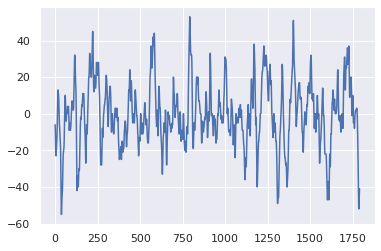

In [469]:
plt.plot(x[0, :, 1])

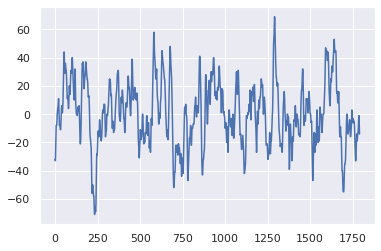

In [470]:
plt.plot(x[0, :, 0])

# extracting features from datas


<div style="direction:rtl", align='right'> در ادامه به انتخاب ویژگی ها میپردازیم
باید توجه داشت که در این قسمت کانال داریم
برای همین هر ۲۶ ویژگی که استخراج کرده ایم را بر روی هر دو چنل اجرا میکنیم.

برای همین هم ۵۲ عدد در نهایت استخراج میشود که بایستی از بین این تعداد ويژگی بهترین ها را انتخاب نمود.
برای همین از

 feature_selection
 
  استفاده میکنیم.
</div>



In [471]:
x_fft = np.fft.fft(x)
x_ps = np.abs(x_fft**2)/len(x)
feature = np.arange(len(x)*2*26).reshape(2 * 26, len(x), 1)
ALOW = 1e-6
for index in range(len(x)):
  for channel in range(2):
    #Time Domain - Dimensional Parameters
    data = x[index, :, channel]
    feature[(channel*26) + 0, index,0] = np.min(data) #minimum                                                       1
    feature[(channel*26) + 1, index,0] = np.max(data) #maximum                                                       2
    feature[(channel*26) + 2, index,0] = np.mean(data) #mean                                                         3
    feature[(channel*26) + 3, index,0] = np.sqrt(np.mean((data)**2)) #root-mean-square                               4
    feature[(channel*26) + 4, index,0] = (np.mean(np.sqrt(np.abs(data))))**2 #square-mean-root                       5
    feature[ (channel*26) + 5, index,0] = np.var(data) #variance                                                     6
    feature[ (channel*26) + 6, index,0] = np.std(data) # standard deviation                                          7
    feature[ (channel*26) + 7, index,0] = np.mean((data)**2) #mean square                                            8
    feature[ (channel*26) + 8, index,0] = np.mean(np.abs(data)) #mean-abslute                                        9
    feature[ (channel*26) + 9, index,0] = np.max(np.abs(data)) #peak                                                 10
    feature[ (channel*26) + 10, index,0] = np.ptp(data) #peak to peak                                                11

    #Time Domain - Dimensional Parameters
    feature[ (channel*26) + 11, index,0] = np.max(np.abs(data))/max(np.sqrt(np.mean((data)**2)), ALOW) #crest Factor 12
    feature[ (channel*26) + 12, index,0] = stats.skew(data) #skewness                                                13
    feature[ (channel*26) + 13, index,0] = stats.kurtosis(data) #kurtosis                                            14
    feature[ (channel*26) + 14, index,0] = np.sqrt(np.mean((data)**2))/max(np.mean((data)), ALOW) #form factor       15
    feature[ (channel*26) + 15, index,0] = np.max(np.abs(data))/max(np.mean(data), ALOW) #Pulse Indicator            16
    feature[ (channel*26) + 16, index,0] = (np.sqrt(np.mean((data)**2)))/(np.mean(np.abs(data))) #Shape Factor       17
    feature[ (channel*26) + 17, index,0] = (np.max(np.abs(data)))/(np.mean(np.abs(data)))#                           18
    feature[ (channel*26) + 18, index,0] = (np.max(np.abs(data)))/((np.mean(np.sqrt(np.abs(data))))**2)#             19
    
    data = x_ps[index, :, channel]
    #Frequency-domain
    feature[ (channel*26) + 19, index,0] = np.max(data)#                                                             20
    feature[ (channel*26) + 20, index,0] = np.sum(data)#                                                             21
    feature[ (channel*26) + 21, index,0] = np.mean(data)#                                                            22
    feature[ (channel*26) + 22, index,0] = np.var(data)#                                                             23
    feature[ (channel*26) + 23, index,0] = np.max(np.abs(data))#                                                     24
    feature[ (channel*26) + 24, index,0] = stats.kurtosis(data)#                                                     25
    feature[ (channel*26) + 25, index,0] = stats.skew(data) #                                                        26

    

feature_name = ['Min1', 'Max1', 'Mean1', 'Rms1', 'Var1', 'Std1', 'mean_square1', 'Peak1', 'Skew1', 'Kurtosis1', 'P2p1', \
                   'CrestFactor1', 'FormFactor1', 'PulseIndicator1', 'ShapeFactor1', 'MAbs1', 'Smr1', 'ImpulseFactor1',  \
                   'ClearanceFactor1', 'Max_f1', 'Sum_f1', 'Mean_f1', 'Var_f1', 'Peak_f1', 'Skew_f1', 'Kurtosis_f1',
                'Min2', 'Max2', 'Mean2', 'Rms2', 'Var2', 'Std2', 'mean_square2', 'Peak2', 'Skew2', 'Kurtosis2', 'P2p2', \
                   'CrestFactor2', 'FormFactor2', 'PulseIndicator2', 'ShapeFactor2', 'MAbs2', 'Smr2', 'ImpulseFactor2',  \
                   'ClearanceFactor2', 'Max_f2', 'Sum_f2', 'Mean_f2', 'Var_f2', 'Peak_f2', 'Skew_f2', 'Kurtosis_f2']
                   

# shape of features


In [472]:
feature.shape

(52, 3576, 1)

# normalizing datas


<div style="direction:rtl", align='right'> حال نوبت به نرمالایز کردن داده ها میرسد
برای این مورد از ۲ اسکالر مختلف استفاده میکنیم و نمودار مربوط به هر کدام را میکشیم

با توجه به اینکه این کار از تغییرات بازه های سیگنال میکاهد مطلوب ما نیست و در ادامه از آنها استفاده نمیکنیم
 </div>

StandardScaler: Standardize features by removing the mean and scaling to unit variance.

RobustScaler: Scale features using statistics that are robust to outliers.



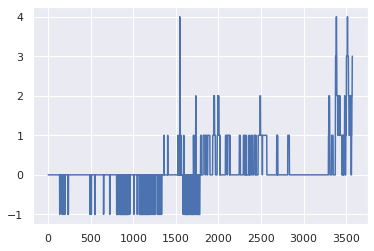

In [473]:
scaler = StandardScaler() 

features_StandardScaler_col = np.zeros_like(feature)
for i in range(len(feature)):
   features_StandardScaler_col[i, :] = scaler.fit_transform(feature[i, :, 0].reshape(-1, 1))
plt.plot(features_StandardScaler_col[6,:,0])

(52, 3576, 1)


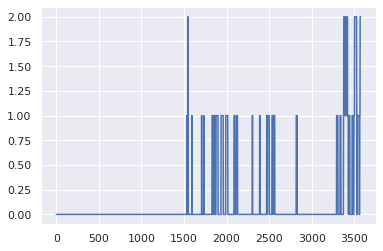

In [474]:
scaler = RobustScaler()
print(features_StandardScaler_col.shape)
for i in range(len(feature)):
   features_StandardScaler_col[i, :] = scaler.fit_transform(feature[i, :, 0].reshape(-1, 1))
plt.plot(features_StandardScaler_col[6,:,0])

# feature selection


<div style="direction:rtl", align='right'> 
در ادامه به انتخاب بهترین ویژگی ها میپردازیم. 
برای همین یک دقت تمام ویژگی ها را به دست می آوریم و برای پردازش در مراحل بعدی در یک دیکشنری ذخیره میکنیم.
 </div>




In [475]:
feature_dictionary = dict()

for index in range(len(feature_name)):
  feature_dictionary[feature_name[index]] = feature[index, :]

### calculating recall ID3 using K0fold


<div style="direction:rtl", align='right'> 

برای اندازه گیری دقت هم از

 kfold
 
  استفاده میکنیم
    برای جداسازی کلاس ها از هم از درخت تصمیم استفاده میکنیم
 </div>



In [476]:
cv = KFold(n_splits=5, random_state=seed, shuffle=True)
model = tree.DecisionTreeClassifier(random_state=seed)
accuracy_score_dic = dict()
max_accuracy_feature= None
best_score = 0
for i in feature_name:
  accuracy =  np.mean(cross_val_score(model, feature_dictionary[i], ydata, scoring='recall', cv=cv, n_jobs=-1))
  accuracy_score_dic[i] = accuracy

  if(best_score < accuracy):
    max_accuracy_feature = i
    best_score = accuracy

### selecting features using corrolation and f1 score


<div style="direction:rtl", align='right'> برای انتخاب بقیه داده ها از همان روال فاز دوم استفاده میکنیم.
به این شکل که برای انتخاب داده جدید ابتدا همبستگی آن را با تمام داده های دیگر میگیریم و بدترین آن را انتخاب میکنیم.
مقدار انتخاب شده را از یک کم میکنیم.
در نهایت عدد به دست آمده را با دقت ترکیب میکنیم(میانگین هارمونیک یا همان اف_وان)
</div>
f1_score
<div style="direction:rtl", align='right'>

بعد از انجام این کار بهترین عدد را بدست می آوریم و ویژگی مربوط به آنرا به مجموعه داده نهاییمان اضافه میکنیم

این کار را تا انتخاب ۵ ویژگی انجام میدهیم
 </div>



In [477]:
final_feature_dic = dict()
final_feature_dic[max_accuracy_feature] = feature_dictionary[max_accuracy_feature]

number_of_selected_features = 5

for _ in range(number_of_selected_features - 1):
    best_f1_score = 0
    selected_feature = None
    for key in feature_dictionary:

        if key in final_feature_dic:
            continue

        worst_correlation_value = 0
        for final_key in final_feature_dic:
            pearson, _ = pearsonr(feature_dictionary[key].flatten(
            ), final_feature_dic[final_key].flatten())

            if abs(pearson) > worst_correlation_value:
                worst_correlation_value = abs(pearson)

        correlation_point = (1 - worst_correlation_value)
        accuracy = accuracy_score_dic[key]

        f1_score = 2 * ((correlation_point * accuracy) /
                        (correlation_point + accuracy))

        if best_f1_score < f1_score:
            best_f1_score = f1_score
            selected_feature = key

    final_feature_dic[selected_feature] = feature_dictionary[selected_feature]

# calculating train-validation-test datas  


<div style="direction:rtl", align='right'> بعد از انتخاب ویژگی های نهایی نوبت به جداسازی داده ها از هم میرسد

برای این کار از
</div>

 train_test_split
 
 <div style="direction:rtl", align='right'>
  استفاده میکنیم.

قبل از جداسازی داده ها باید داده های مربوط به خود سیگنال و ویژگیهای بدست آمده از آن را با هم ترکیب کنیم تا بتوانیم داده ها را به تست و آموزش بشکنیم

بعد از جداسازی داده ها دوباره باید آن ها را شکست و ویژگی ها و سیگنال ها را از هم جدا کنیم.
 </div>



In [478]:
weight_val = 0.15
weight_test = 0.15

final_features_data = np.arange(len(x) * number_of_selected_features).reshape(len(x), number_of_selected_features)
count= 0
for key in final_feature_dic:
  for item in range(len(final_feature_dic[key])):
    final_features_data[item][count] = final_feature_dic[key][item][0]
  count += 1

# merge signals with features
x_with_feature = np.arange(len(x) * (len(x[0]) + number_of_selected_features) * 2).reshape(len(x), (len(x[0]) + number_of_selected_features), 2)
for index in range(len(x)):
    x_with_feature[index, 0:1792, :] = x[index]
    x_with_feature[index, 1792:, 0] = final_features_data[index]


x_with_feature_train, x_with_feature_test, y_train, y_test = train_test_split(x_with_feature, y, test_size=weight_val, random_state=seed)
x_with_feature_train, x_with_feature_val, y_train, y_val = train_test_split(x_with_feature_train, y_train, test_size=weight_test, random_state=seed)

x_test = x_with_feature_test[:, 0:window_len, :]
x_feature_test = x_with_feature_test[:, window_len:, 0]

x_val = x_with_feature_val[:, 0:window_len, :]
x_feature_val = x_with_feature_val[:, window_len:, 0]

x_train = x_with_feature_train[:, 0:window_len, :]
x_feature = x_with_feature_train[:, window_len:, 0] 


#final model

<div style="direction:rtl", align='right'> 
در این قسمت با استفاده از دیتاها و فیچر های انتخاب شده، یک شبکه عصبی جهت تشخیص صرع در داده ورودی پیاده سازی می کنیم

در ابتدا ابعاد ورودی های شبکه مان را تعیین می کنیم

Inputs1 
سیگنال های ورودی 

feaure_input
فیچر های انتخاب شده 

در ابتدا سیگنال ها را به یک لایه کانولوشن یک بعدی با مشخصات 25 فیلتر و فیلتر های به سایز 3 می دهیم

سپس با استفاده از لایه مکس پولینگ با سایز 7، خروجی لایه کانولوشن را خلاصه سازی می کنیم

در مرحله بعد مجدد یک لایه کانولوشن یک بعدی و با 10 فیلتر و فیلتر هایی به سایز 3 می زنیم

مجدد مکس پولینگ 10 میزنیم و سپس خروجی را برای دادن به لایه بعد فلاتن و تبدیل به وکتور می کنیم
حال خروجی قبلی را به یک لایه فولی کانکتد با تعداد نورون 75 و تابع اکتیویشن 
«رلو» 
را استفاده می کنیم. در ادامه مجدد خروجی را به یک لایه فولی کانکتد دیگر با اعداد نورون 20 و اکتیویشن «رلو» دیگر می دهیم

از طرف دیگر فیچر های انتخاب شده را به یک لایه فولی کانکتد با تعداد نورون برابر با تعداد فیچر ها می دهیم. 

در نهایت این دو لایه فولی کانکتد را کانکت کرده و  به آخرین لایه مان که دو نورون دارد و اکتیویشن آن «سافت-مکس» بوده می دهیم  

بعد از پیاده سازی لایه های شبکه، مقادیر ورودی ها و خروجی های شبکه مان را می دهیم. در اینجا ورودی شامل یک لیست از سیگنال ها و فیچر های انتخا شده می باشد و خروجی آن نیز به صورت دو عدد بوده که برابر با مقدار فایر شده دو نورون آخر می باشد

مطابق توضیحات داده شده 
</div>
<div >
 optimizer = Adam
</div>





In [479]:

inputs1 = tf.keras.Input(shape=x[0].shape, name='Input_signals')
feature_input = tf.keras.Input((number_of_selected_features,), name="selected_feature")
model1 = layers.Conv1D(filters = 25, kernel_size=(3), name="Conv1D_1", activation='relu')(inputs1)
model1 = layers.MaxPool1D(pool_size = (7), name="MaxPool1D_1")(model1)
model1 = layers.Conv1D(filters = 10, kernel_size=(3), name="Conv1D_2", activation='relu')(model1)
model1 = layers.MaxPool1D(pool_size = (10), name="MaxPool1D_2")(model1)
# model1 = layers.Conv1D(filters = 20, kernel_size=(3), name="Conv1D_3")(model1)
# model1 = layers.MaxPool1D(pool_size = (2), name="MaxPool1D_3")(model1)
# model1 = layers.Conv1D(filters = 18, kernel_size=(3), name="Conv1D_4")(model1)
# model1 = layers.MaxPool1D(pool_size = (3), name="MaxPool1D_4")(model1)
model1 = layers.Flatten( name="flatten_layer")(model1)
model1 = layers.Dense(75, activation='relu', name="fully_connected_signal_1")(model1)
model1 = layers.Dense(20, activation='relu', name="fully_connected_signal_2")(model1)

model2 = layers.Dense(number_of_selected_features, activation='relu', name='fully_connected_feature', trainable=False)(feature_input)

concat_layer= tf.keras.layers.Concatenate(name="Concatenate")([model1,model2])
outputs = layers.Dense(2, name='classification', activation='softmax')(concat_layer)

model = tf.keras.Model([inputs1, feature_input], outputs)

base_learning_rate = 0.000070
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss={'classification': tf.keras.losses.CategoricalCrossentropy()},
             
              metrics=['accuracy'])

history = model.fit([x_train, x_feature],
                    y = y_train,
                    batch_size=16,
                    epochs=60,
                    validation_data=([x_val, x_feature_val], y_val))

model_loss, model_accuracy = model.evaluate([x_test, x_feature_test], y_test, verbose=2)




/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60
162/162 [==============================] - 5s 24ms/step - loss: 9.5425 - accuracy: 0.5029 - val_loss: 3.7012 - val_accuracy: 0.5263
Epoch 2/60
162/162 [==============================] - 4s 23ms/step - loss: 3.4480 - accuracy: 0.5381 - val_loss: 2.7678 - val_accuracy: 0.5658
Epoch 3/60
162/162 [==============================] - 6s 37ms/step - loss: 2.3991 - accuracy: 0.5780 - val_loss: 2.0613 - val_accuracy: 0.6184
Epoch 4/60
162/162 [==============================] - 4s 22ms/step - loss: 1.7596 - accuracy: 0.6202 - val_loss: 1.7179 - val_accuracy: 0.6228
Epoch 5/60
162/162 [==============================] - 4s 22ms/step - loss: 1.4244 - accuracy: 0.6473 - val_loss: 1.4685 - val_accuracy: 0.6798
Epoch 6/60
162/162 [==============================] - 4s 25ms/step - loss: 1.1908 - accuracy: 0.6616 - val_loss: 1.3266 - val_accuracy: 0.6842
Epoch 7/60
162/162 [==============================] - 6s 34ms/step - loss: 1.0249 - accuracy: 0.6709 - val_loss: 1.2044 - val_accuracy: 0.6886

In [480]:
model.summary()

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_signals (InputLayer)     [(None, 1792, 2)]    0           []                               
                                                                                                  
 Conv1D_1 (Conv1D)              (None, 1790, 25)     175         ['Input_signals[0][0]']          
                                                                                                  
 MaxPool1D_1 (MaxPooling1D)     (None, 255, 25)      0           ['Conv1D_1[0][0]']               
                                                                                                  
 Conv1D_2 (Conv1D)              (None, 253, 10)      760         ['MaxPool1D_1[0][0]']            
                                                                                           

#  schematic of final model

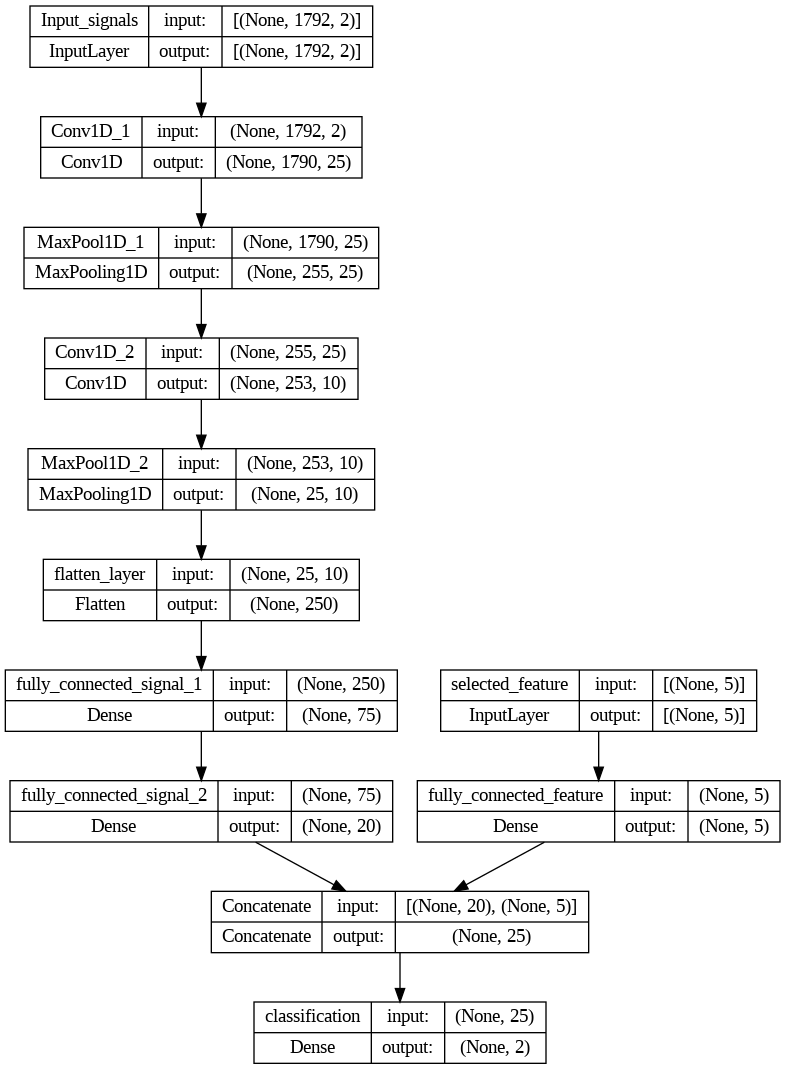

In [481]:
tf.keras.utils.plot_model(model, show_shapes=True)

# ploting train and validation accuracy

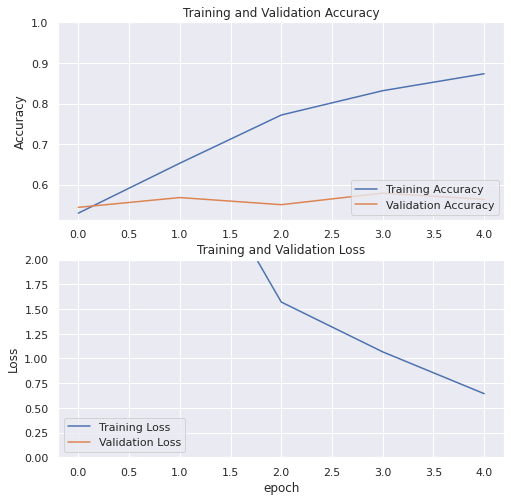

In [501]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.ylabel('Loss')
plt.ylim([0, 2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

model.save('models/')

# Create confusion matrix and normalizes it over predicted (columns)

In [483]:
y_prediction = model.predict([x_test, x_feature_test])
y_prediction = np.argmax (y_prediction, axis = 1)
y_test_after_fit =np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_after_fit, y_prediction , normalize='pred')
print(cm)

17/17 [==============================] - 0s 20ms/step
[[0.85099338 0.07659574]
 [0.14900662 0.92340426]]


# calculating recall, precision and f1-score of test data

In [484]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
recall = np.min(recall)
print("recall : ", recall)
precision = np.diag(cm) / np.sum(cm, axis = 0)
precision = np.min(precision)
print("precision : ", precision)

f1 = 2 * (recall * precision) / (recall + precision)
print("f1_score: ", f1)

recall :  0.8610545401989251
precision :  0.8509933774834437
f1_score:  0.855994395709761


# calculating ROC

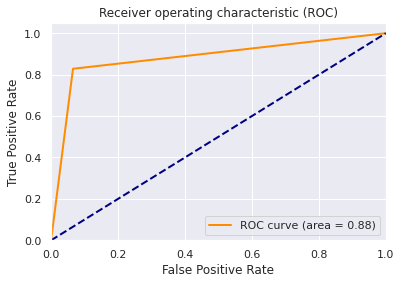

In [485]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_after_fit, y_prediction)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#having real (full data) as input

In [486]:
print(final_feature_dic.keys())

dict_keys(['Rms1', 'Smr1', 'FormFactor2', 'PulseIndicator1', 'Mean1'])


# ploting signals of two datas

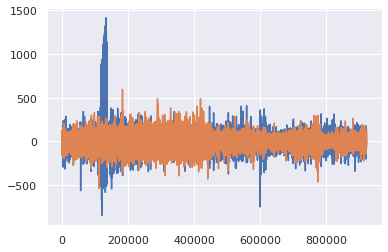

In [487]:

false_alarm_dataset_name_1 = "seizure_data/chb01_03.edf"

f = pyedflib.EdfReader(false_alarm_dataset_name_1)
sigbufs1 = np.zeros((2, f.getNSamples()[0]))

sigbufs1[0, :] = f.readSignal(16)

false_alarm_dataset_name_2 = "seizure_data/chb05_06.edf"
f._close()
f = pyedflib.EdfReader(false_alarm_dataset_name_2)
sigbufs2 = np.zeros((2, f.getNSamples()[0]))

sigbufs2[0, :] = f.readSignal(16)

plt.plot(sigbufs2[0, :])
plt.plot(sigbufs1[0, :])
f._close()

<div style="direction:rtl", align='right'> 
 در اینجا داده ای که داریم به صورت یک ساعته بوده و پنجره نشده است. برای این کار دو داده 


- chb01_01
- chb05_06

را برای بررسی داریم که داده اول یکی از داده های داخل آموزش بوده ولی داده دیگر در آموزش حضور نداشته است

مطابق بخش های قبل روی دو کانال مشخص شده داده مورد نظر پنجره زده و فیچر های آنها را بدست می آوریم و در ادامه با توجه به محل آن ها در بازه و فاصله آن ها از زمان تشنج، لیبل آن ها را بدست می آوریم   
</div>


In [488]:
false_alarm_dataset_name = "seizure_data/chb01_03.edf"

start_time_freq = 2996 * freq_sampling
end_time_freq =  3036 * freq_sampling


# false_alarm_dataset_name = "seizure_data/chb05_06.edf"
# start_time_freq = 417 * freq_sampling
# end_time_freq =  532 * freq_sampling


f = pyedflib.EdfReader(false_alarm_dataset_name)
sigbufs = np.zeros((2, f.getNSamples()[0]))

sigbufs[0, :] = f.readSignal(16)
sigbufs[1, :] = f.readSignal(17)
# butter filter
b, a = butter(3, [0.5,40], btype='bandpass',fs=freq_sampling)
channel1_filtered = np.array([lfilter(b,a,sigbufs[0,:])])
channel2_filtered = np.array([lfilter(b,a,sigbufs[1,:])])

false_alaram_dataset = np.arange(2 * (3600 * freq_sampling)).reshape((3600 * freq_sampling), 2)
false_alaram_dataset[:, 0] = channel1_filtered[0, :]
false_alaram_dataset[:, 1] = channel2_filtered[0, :]
res = []
window_shift_for_false_alarm = 1

data_window_signal = np.arange((3600 - (windows_size - 1) - 1) * window_len * 2).reshape((3600 - (windows_size - 1) - 1), window_len, 2);
data_feature = np.arange((3600 - (windows_size - 1)- 1) * 5).reshape((3600 - (windows_size - 1) - 1), 5)
label_signal = np.arange((3600 - (windows_size - 1) - 1))

counter = 0
for window_start in range(0, ((3600 - windows_size) * freq_sampling), freq_sampling * window_shift_for_false_alarm):
    selected_window = false_alaram_dataset[window_start: (window_start + window_len ), :]
    data_window_signal[counter] = selected_window

    selected_features = np.arange(number_of_selected_features)
    selected_features[0] = np.sqrt(np.mean((selected_window[:, 0])**2))
    selected_features[1] = (np.sqrt(np.mean((selected_window[:, 0])**2)))/(np.mean(np.abs(selected_window[:, 0])))
    selected_features[2] = stats.skew(selected_window[:, 1])
    selected_features[3] = stats.kurtosis(selected_window[:, 0])
    selected_features[4] = np.mean(selected_window[:, 0])

  # if (window_start + int(window_len / 2)) > start_time_freq and (window_start + int(window_len / 2)) < end_time_freq :
  #   label_signal[counter] = 1
    
    if window_start > start_time_freq and  (window_start + window_len) < end_time_freq:
      label_signal[counter] = 1 
    else :
      label_signal[counter] = 0


    data_feature[counter] =  selected_features
    counter += 1


print(data_window_signal.shape)
print(data_feature.shape)
y_prediction = model.predict([data_window_signal, data_feature])
f._close()

(3593, 1792, 2)
(3593, 5)
113/113 [==============================] - 2s 14ms/step


# ploting lable of signal

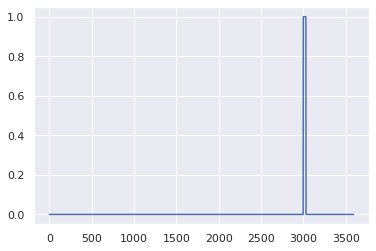

In [489]:
plt.plot(label_signal)

#plot of predicted lable by model

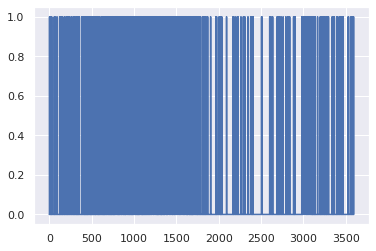

In [490]:
plt.plot(np.argmax(y_prediction, axis=1))
predicted_label = np.argmax(y_prediction, axis=1)
# np.argmax(y_prediction, axis=1)

# the valu of predicted labled around seizure ooeriod

In [491]:
predicted_label[2990:3040 ]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1])

# calculating false alarm

false alarm
<div style="direction:rtl", align='right'> 
منظور پنجره هایی در واقعیت محل تشنج نبودند اما شبکه به اشتباه آن ها تشنج پیشبینی کرده است  

برای محاسبه آن کافی است در یک حلقه بررسی کنیم که اگر پیشبینی تشنج و لیبل اصلی نرمال بود؛ آن پنچره را به عنوان عنصر فالس آلارم بشناسیم
</div>

904


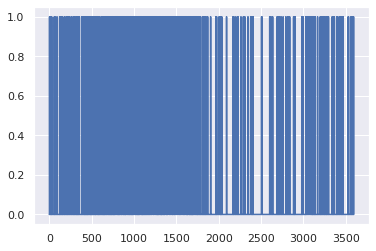

In [492]:
false_alarm_count = np.zeros_like(predicted_label)
count = 0
for index in range(len(predicted_label)):
    if label_signal[index] == 0 and predicted_label[index] == 1:
      false_alarm_count[index] = 1
      count += 1

print(count)
plt.plot(false_alarm_count)

# calculating fals alarm lenght

In [493]:
seizure_prieod_list = []
label_preiod_count = 8
threshold_priod = 5
for pred_label_index in range(len(predicted_label) - label_preiod_count):
  seizure_count = 0
  for i in range(pred_label_index, pred_label_index + label_preiod_count):
    if predicted_label[i] == 1:
      seizure_count += 1


  if seizure_count >= threshold_priod:
    seizure_prieod_list.append([pred_label_index, pred_label_index + label_preiod_count - 1])

In [494]:
seizure_prieod_list

[[550, 557],
 [551, 558],
 [552, 559],
 [556, 563],
 [557, 564],
 [560, 567],
 [561, 568],
 [562, 569],
 [663, 670],
 [664, 671],
 [674, 681],
 [675, 682],
 [676, 683],
 [677, 684],
 [678, 685],
 [679, 686],
 [680, 687],
 [681, 688],
 [744, 751],
 [777, 784],
 [778, 785],
 [779, 786],
 [780, 787],
 [781, 788],
 [782, 789],
 [783, 790],
 [784, 791],
 [785, 792],
 [786, 793],
 [787, 794],
 [788, 795],
 [789, 796],
 [790, 797],
 [801, 808],
 [802, 809],
 [803, 810],
 [831, 838],
 [832, 839],
 [833, 840],
 [834, 841],
 [835, 842],
 [836, 843],
 [837, 844],
 [838, 845],
 [839, 846],
 [849, 856],
 [851, 858],
 [852, 859],
 [853, 860],
 [854, 861],
 [855, 862],
 [856, 863],
 [857, 864],
 [858, 865],
 [859, 866],
 [860, 867],
 [861, 868],
 [862, 869],
 [863, 870],
 [864, 871],
 [883, 890],
 [884, 891],
 [885, 892],
 [903, 910],
 [904, 911],
 [905, 912],
 [906, 913],
 [907, 914],
 [908, 915],
 [909, 916],
 [910, 917],
 [911, 918],
 [912, 919],
 [913, 920],
 [914, 921],
 [915, 922],
 [916, 923],

In [495]:
len(seizure_prieod_list)

679

merging sezuire perods

In [496]:
# seizure_prieod_list
start = seizure_prieod_list[0][0]
end = 0
merged_list = []
for item in range(len(seizure_prieod_list)-1):
  # if (seizure_prieod_list[item][1] == )
  if ((seizure_prieod_list[item][1] - seizure_prieod_list[item+1][0]) <= ((-windows_size)/2)):
      end = seizure_prieod_list[item][1]
      merged_list.append([start, end])
      start = seizure_prieod_list[item+1][0]
  
merged_list.append([start, seizure_prieod_list[len(seizure_prieod_list)-1][1]])
print(len(seizure_prieod_list))
print(len(merged_list))
merged_list

679
24


[[550, 569],
 [663, 688],
 [744, 751],
 [777, 797],
 [801, 810],
 [831, 871],
 [883, 892],
 [903, 924],
 [937, 944],
 [953, 967],
 [971, 1010],
 [1014, 1050],
 [1062, 1089],
 [1107, 1269],
 [1291, 1312],
 [1318, 1452],
 [1456, 1623],
 [1635, 1668],
 [1674, 1687],
 [1694, 1728],
 [2372, 2383],
 [2810, 2818],
 [2992, 3096],
 [3106, 3116]]

# model without dense layer


In [497]:
inputs1 = tf.keras.Input(shape=x[0].shape)
feature_input = tf.keras.Input((number_of_selected_features,))
model1 = layers.Conv1D(filters = 30, kernel_size=(3))(inputs1)
# model1 = layers.MaxPool1D(pool_size = (2))(model1)
# model1 = layers.Conv1D(filters = 20, kernel_size=(3))(inputs1)
# model1 = layers.Conv1D(filters = 18, kernel_size=(3))(inputs1)
model1 = layers.MaxPool1D(pool_size = (2))(model1)
model1 = layers.Flatten()(model1)
model1 = layers.Dense(180, activation='relu')(model1)
model1 = layers.Dense(30, activation='relu', name='feature')(model1)

concat_layer= tf.keras.layers.Concatenate()([model1,feature_input])
outputs = layers.Dense(2, name='classification', activation='softmax')(concat_layer)

model = tf.keras.Model([inputs1, feature_input], outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss={'classification': tf.keras.losses.CategoricalCrossentropy()},
               metrics=['accuracy'])

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

history = model.fit([x_train, x_feature],
                    y = y_train,
                    epochs=5,
                    validation_data=([x_val, x_feature_val], y_val))


model_loss, model_accuracy = model.evaluate([x_test, x_feature_test], y_test, verbose=2)

Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 1792, 2)]    0           []                               
                                                                                                  
 conv1d_49 (Conv1D)             (None, 1790, 30)     210         ['input_10[0][0]']               
                                                                                                  
 max_pooling1d_49 (MaxPooling1D  (None, 895, 30)     0           ['conv1d_49[0][0]']              
 )                                                                                                
                                                                                                  
 flatten_20 (Flatten)           (None, 26850)        0           ['max_pooling1d_49[0][0]']

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
81/81 [==============================] - 9s 101ms/step - loss: 10.7965 - accuracy: 0.5184 - val_loss: 8.4841 - val_accuracy: 0.5022
Epoch 2/5
81/81 [==============================] - 7s 91ms/step - loss: 3.9167 - accuracy: 0.6485 - val_loss: 7.0492 - val_accuracy: 0.5526
Epoch 3/5
81/81 [==============================] - 8s 97ms/step - loss: 2.4291 - accuracy: 0.7344 - val_loss: 5.5941 - val_accuracy: 0.5329
Epoch 4/5
81/81 [==============================] - 8s 93ms/step - loss: 1.9143 - accuracy: 0.7654 - val_loss: 5.9007 - val_accuracy: 0.5702
Epoch 5/5
81/81 [==============================] - 7s 89ms/step - loss: 0.9398 - accuracy: 0.8436 - val_loss: 5.1828 - val_accuracy: 0.5702
17/17 - 1s - loss: 5.2929 - accuracy: 0.5698 - 704ms/epoch - 41ms/step


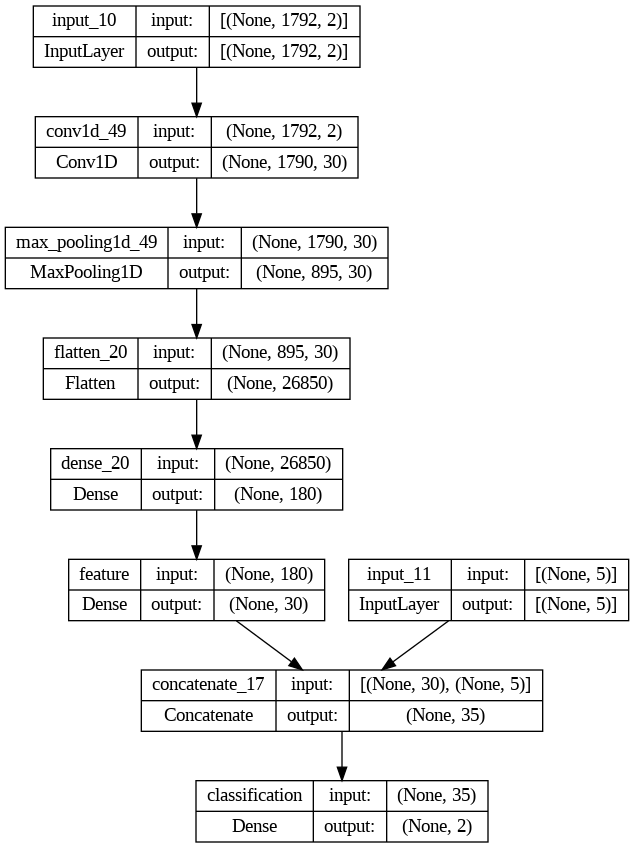

In [498]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [499]:
inputs1 = tf.keras.Input(shape=x[0].shape)
model1 = layers.Conv1D(filters = 30, kernel_size=(3))(inputs1)
model1 = layers.MaxPool1D(pool_size = (2))(model1)
model1 = layers.Flatten()(model1)
model1 = layers.Dense(180, activation='relu')(model1)
model1 = layers.Dense(30, activation='relu', name='feature')(model1)
outputs = layers.Dense(2, name='classification', activation='softmax')(model1)

model = tf.keras.Model(inputs1, outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss={'classification': tf.keras.losses.CategoricalCrossentropy()},
               metrics=['accuracy'])

# model.summary()


history = model.fit(x_train,
                    y = y_train,
                    epochs=5,
                    validation_data=(x_val, y_val))

model_loss, model_accuracy = model.evaluate(x_test, y_test, verbose=2)


Epoch 1/5
81/81 [==============================] - 8s 91ms/step - loss: 7.9120 - accuracy: 0.5296 - val_loss: 6.3423 - val_accuracy: 0.5439
Epoch 2/5
81/81 [==============================] - 8s 102ms/step - loss: 3.3481 - accuracy: 0.6527 - val_loss: 5.2018 - val_accuracy: 0.5680
Epoch 3/5
81/81 [==============================] - 7s 88ms/step - loss: 1.5707 - accuracy: 0.7716 - val_loss: 5.1329 - val_accuracy: 0.5504
Epoch 4/5
81/81 [==============================] - 8s 96ms/step - loss: 1.0666 - accuracy: 0.8316 - val_loss: 4.5907 - val_accuracy: 0.5789
Epoch 5/5
81/81 [==============================] - 8s 93ms/step - loss: 0.6437 - accuracy: 0.8734 - val_loss: 5.9067 - val_accuracy: 0.5636
17/17 - 0s - loss: 6.7208 - accuracy: 0.5866 - 355ms/epoch - 21ms/step


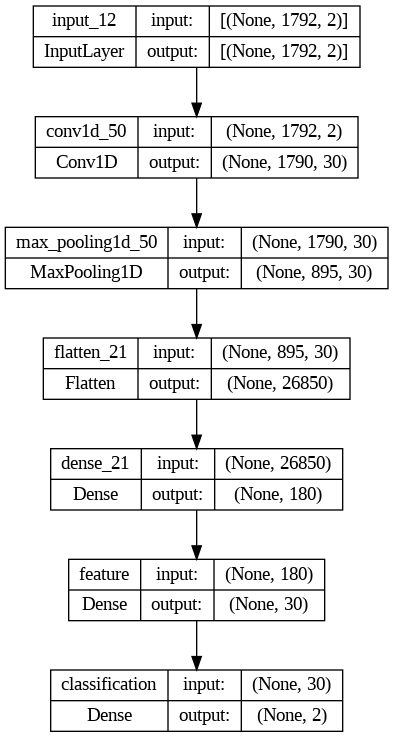

In [500]:
tf.keras.utils.plot_model(model, show_shapes=True)

# how to handle a real world problem

<div style="direction:rtl", align='right'> 


پیشنهاد برای پیاده سازی سیستمی ایمپلنت جهت تشخیص تشنج در بدن انسان:

برای انجام این کار پیشنهاد میشود که به جای دو کلاس برای داده هایمان از۳ کلاس استفاده کنیم. به این صورت که کلاس های اول و دوم همان داده های تشنج و نرمال است و کلاس
سوم برای داده های بازه ی قبل از وقوع تشنج است.دلیل استفاده از این کلاس این است که بتوانیم وقوع تشنج را پیش از وقوع پیش بینی کنیم.

ابتدا بایستی برروی داده های آموزشی پنجره بزنیم داده ها را به شکل زیر تقسیم میکنیم و‌ آنها را لیبل میزنیم:

۲- بازه وقوع تشنج 
۱- ۱۰ ثانیه قبل از تشنج
۳ - بازه های نرمال (قبل از ۱۰ ثانیه یا بعد از وقوع تشنج)

با توجه به اینکه بازه های تشنج و قبل از تشنج مقدار کمی هستند نیاز به data augmentation داریم.برای این کار پیشنهاد میشود از شبکه GAN برای ایجاد دیتاهای آموزشی استفاده کرد

حال باید بررسی کنیم که با توجه به مقدار خروجی چند دیتا تست تشنج در چه بازه ای اتفاق می افتد و آیا نزدیک به بازه تشنج هستیم یا خیر

برای این کار میتوان لیبل تعدای پنجره ی  متوالی را با استفاده از جمع وزندار لیبل خروجی محاسبه کرد

مثلا اگر ده پنجره متوالی را بخواهیم برای وجود تشنج یا نزدیک بودن به تشنج بررسی کنیم میتوانیم به کلاس تشنج وزن یک و به کلاس نزدیک به تشنج وزن نیم را بدهیم و کلاس نرمال هم وزن صفر را به خود اختصاص میدهد

در صورتی که جمع وزندار کلاس ها بزرگتر از شش شد آلارم فعال بشود و دارو به بیمار تزریق بشود

پیشنهادهایی برای پیاده سازی شبکه:

با توجه به اینکه داده های ورودی سیگنال هستند باید در ابتدای شبکه از لایه های کانولوشن یک بعدی با تعداد فیلتر و سایز فیلتر مناسب استفاده کنیم.
با توجه به پراکندگی سیگنال بهتر است که activation function لایه ها را برابر با Relu بجای sigmoid قرار بدهیم(دلیل آن این است که sigmoid بازه های تغییرات را ملایم تر میکند و این برای شبکه ما خوب نیست )
با توجه به حجم و تعداد داده ها ممکن است که شبکه ساده تر نسبت به شبکه پیچیده تر خروجی بهتری را به ما بدهد دلیل آن کم بودن دیتاها و سختی پردازش آنها میباشد که این خود باعث overfit و عدم generalization میشود
با توجه به تعداد زیاد پارامتر شبکه بهتر است که در شبکه خود علاوه بر سیگنال ها از feature ها نیز استفاده بکنیم

</div>